## Supervised Learning - Linear Regression

Linear regression models are popular because they can be fit very quickly, and are very interpretable.
You are probably familiar with the simplest form of a linear regression model (i.e., fitting a straight line to data) but such models can be extended to model more complicated data behavior.

We begin with the standard imports:

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Load the dataset of house prices in Boston

In [2]:
boston = load_boston()
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

#### Import the data into Pandas dataframe

In [3]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['target'] = boston.target
print(df.shape)

(506, 14)


In [4]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


Plot the correlation between different descriptors in the data

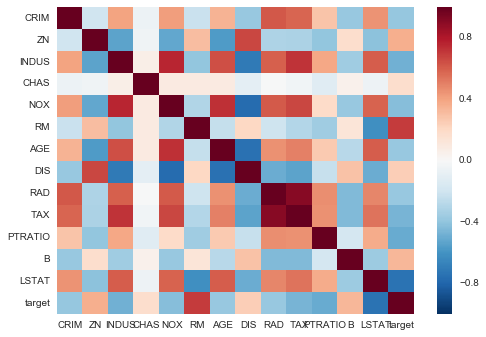

In [5]:
sns.set(style='whitegrid', context='notebook')
sns.heatmap(df.corr())

### Build model for linear regression

First, extract feature matrix and label vector from the dataframe. Split the dataset into training and testing subsets using 80% of the data for training and 20% for testing. 

In [6]:
X = df.iloc[:,range(13)].as_matrix()
y = df['target']
rooms = df['RM']

Splitter function `train_test_split` in the `model.selection` class can be used to split arrays or matrices into random train and test subsets.

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(rooms, y, train_size=0.8, random_state=1)

Construct a linear regression model with default parameters

In [8]:
model1 = LinearRegression()
model1

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Fit the model to the training dataset

In [9]:
model1.fit(X_train.values.reshape(-1,1),y_train)

/usr/local/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Predict labels for the test dataset using the trained model

In [10]:
model1_predict = model1.predict(X_test.values.reshape(-1,1))

Plot the train, test, and predicted values

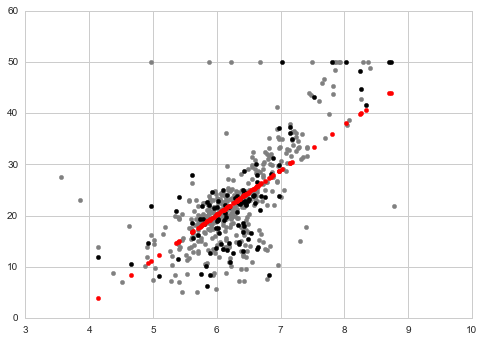

In [11]:
plt.scatter(X_train,y_train,color='grey')
plt.scatter(X_test,y_test,color='black')
plt.scatter(X_test,model1_predict,color='red')

Print the coefficient and the intercept of the line of regression. Calculate RMSE for values in test dataset and corresponding predicted values

In [12]:
from sklearn import metrics
print (model1.coef_, model1.intercept_)
print(model1.predict(8))
RMSE_linear_rooms = np.sqrt(metrics.mean_squared_error(model1_predict, y_test))
print (RMSE_linear_rooms)

(array([ 8.76050748]), -32.395522645607542)
[ 37.68853716]
6.38313511265


### Build model using all the features

Arrange the dataframe as feature matrix and label vectors. Split the dataset into training and testing subsets using 80% of the data for training and 20% for testing.

In [13]:
X = df.iloc[:,range(13)].as_matrix()
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1)

Build a linear regression model with default parameters and fit it to the training data

In [14]:
model_multi = LinearRegression()
model_multi.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Predict labels for the test dataset

In [15]:
model_multi_predict = model_multi.predict(X_test)

In [16]:
RMSE_linear_multi = np.sqrt(metrics.mean_squared_error(model_multi_predict, y_test))
print (RMSE_linear_multi)

4.83472471085


Plot the results

In [17]:
model_multi.predict(np.array([0,0,0,0,0,8,0,0,0,0,0,0,0]).reshape(1,-1))

array([ 67.68255366])

In [18]:
print (model_multi.intercept_)
print (model_multi.coef_)

42.9776502812
[ -1.11325753e-01   5.80279076e-02   1.87598584e-02   2.13323688e+00
  -1.96163839e+01   3.08811292e+00   4.54705952e-03  -1.50032688e+00
   3.04867714e-01  -1.11160011e-02  -9.90074975e-01   7.42536980e-03
  -5.45602934e-01]


In [19]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


**Advantages of linear regression:**
  * It is quite simple to explain and Model training and prediction are fast
  * Features don't need scaling
  * Can perform well with a small number of observations
  
**Disadvantages of linear regression:**
  * Presumes a linear relationship between the features and the response
  * Performance is (generally) not competitive with the best supervised learning methods due to high bias
  * Sensitive to irrelevant features

### Build a polynomial model 

In [20]:
#from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

Understanding polynomial projection

In [21]:
x = np.array([2,3,4])
poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:None].reshape(-1,1))

array([[  2.,   4.,   8.],
       [  3.,   9.,  27.],
       [  4.,  16.,  64.]])

#### Build a `LinearRegression` model using `PolynomialFeatures` and train it using only one feature (number of rooms)

In [22]:
X = df.iloc[:,range(13)].as_matrix()
y = df['target']
rooms = df['RM']
X_train, X_test, y_train, y_test = train_test_split(rooms, y, train_size=0.8, random_state=1)

**Pipeline** can be used to chain multiple estimators into one. This is useful as there is often a fixed sequence of steps in processing the data, for example feature selection, normalization and classification. 
Pipeline serves two purposes here:

**Convenience:** You only have to call *fit* and *predict* once on your data to fit a whole sequence of estimators.

**Joint parameter selection:** You can grid search over parameters of all estimators in the pipeline at once.

All estimators in a pipeline, except the last one, must be transformers (i.e. must have a transform method). The last estimator may be any type (transformer, classifier, etc.).

In [23]:
model_poly = make_pipeline(PolynomialFeatures(2),LinearRegression())
## What should be the value for degree?

In [24]:
model_poly.fit(X_train.values.reshape(-1,1),y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [25]:
model_poly_predict = model_poly.predict(X_test.values.reshape(-1,1))

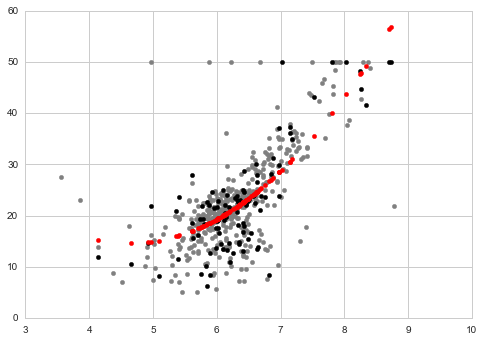

In [26]:
plt.scatter(X_train,y_train,color='grey')
plt.scatter(X_test,y_test,color='black')
plt.scatter(X_test,model_poly_predict,color='red')

Predict price given the number of rooms in a house

In [27]:
model_poly.predict(8)

array([ 43.22462435])

In [28]:
RMSE_poly_rooms = np.sqrt(metrics.mean_squared_error(model_poly_predict, y_test))

In [29]:
print (RMSE_linear_rooms) # Linear Regression using only one feature
print (RMSE_linear_multi) # Linear Regression using all the features
print (RMSE_poly_rooms) # Polynomial Regression using only one feature

6.38313511265
4.83472471085
5.79985820069


### Exercise
Build a polynomial model using all the features 

In [30]:
X = df.iloc[:,range(13)].as_matrix() ## Feature matrix
y = df['target'] ## Target vector
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1)

In [31]:
## Solution

model_poly = make_pipeline(PolynomialFeatures(2),LinearRegression())
model_poly.fit(X_train,y_train)
model_poly_predict = model_poly.predict(X_test)
RMSE_poly_multi = np.sqrt(metrics.mean_squared_error(model_poly_predict, y_test))
print(RMSE_poly_multi)

2.96988468776


Compare the results of different models

In [32]:
print (RMSE_linear_rooms) # Linear Regression using only one feature
print (RMSE_linear_multi) # Linear Regression using all the features
print (RMSE_poly_rooms) # Polynomial Regression using only one feature

print (RMSE_poly_multi) # Polynomial Regression using all the features

6.38313511265
4.83472471085
5.79985820069
2.96988468776


In [33]:
model_poly.predict(np.array([0,0,0,0,0,8,0,0,0,0,0,0,0]).reshape(1,-1))

array([ 22.80279556])

### Exercise 
Build a model to fit the relationship between `x` and `y` and plot the results. Hint: use `PolynomialFeatures` with `LinearRegression`.

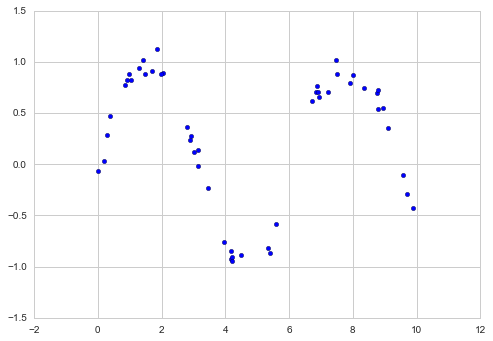

In [34]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50) # sine wave with noise
X = x[:, np.newaxis]
test_data = np.linspace(0, 10, 1000)[:,np.newaxis] # 1000 data points from 0 to 10.

plt.scatter(X,y)
plt.show()

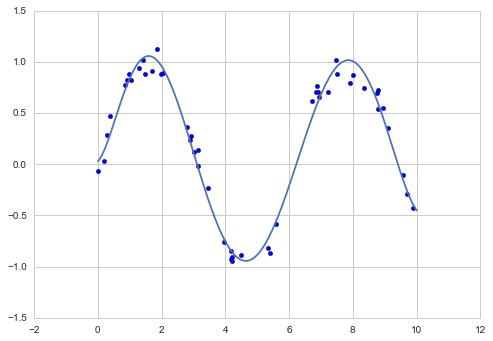

In [35]:
# Solution [Build a model, fit the model to data, predict y values (or labels) for the test data, and plot original and test data]
poly_model = make_pipeline(PolynomialFeatures(7),LinearRegression())

poly_model_fit = poly_model.fit(X,y)
labels = poly_model.predict(test_data)
plt.scatter(X,y)
plt.plot(test_data,labels)

In [36]:
## Solution
#from sklearn.pipeline import make_pipeline
#from sklearn.preprocessing import PolynomialFeatures


For more mathematical details refer **In Depth: Linear Regression** section in Chapter 5 of Python Data Science Handbook